# Trabajo Práctico 1 - Matrices de Insumo Producto


### Consigna 1 - Analizar que sucede con la solución del sistema $p=(I-A)^{-1}d=Ld$

Esta ecuación vemos que representa una economía cerrada, ya que no aparece la demanda externa en la ecuación. Ademas, sabemos que la matriz (I-A), matriz de Leontief muestra como el cambio en demanda final modifica o afecta los valores de producción y demanda de insumos. 

$\textbf{(I-A) inversible} \rightarrow$ Si la matriz es singular, podemos decir que las columnas o filas son linealmente independientes, es decir que no hay un sector que sea combinacion lineal de otro. Existe unica solución (Sistema Compatible Determinado) que permite calcular el efecto total en la economía de un cambio en la demanda final. 

$\textbf{(I-A) inversible y d=0} \rightarrow$ Si mi demanda interna es cero, mi produccion sera cero, ya que no tengo una demanda para satisfacer.

$\textbf{(I-A) no inversible} \rightarrow$ Que la matriz sea singular significa que sus columnas o filas no son linealmente independientes entre si. Esto podria indicar que algun sector o varios sectores son combinacion lineal de otros sectores, que el sistema está mal condicionado, o que algunos sectores dependen completamente de otros. Ademas, no tengo una unica solucion a mi sistema, pudiendo ser compatible indeterminado o incompatible. No se muy bien como cambia la economia con una modificacion en la demanda.

$\textbf{(I-A) no inversible y b=0} \rightarrow$ Si bien no tengo una unica solucion al sistema, pudiendo ser compatible indeterminado o incompatible, podria ser cualquiera de los dos. Todos los sectores estarian inactivos porque no hay demanda final que satisfacer y ademas los sectores son dependientes entre si

### Realizamos todos los import necesarios que utilizaremos más adelante

In [3]:
import funciones as f

### Consigna 2-

Para calcular la inversa de la matriz I-A utilizamos la descomposicion LU que se realiza en la funcion calcularLU mediante el metodo de eliminacion gausseana y obteniendo ademas de la descomposicion, la matriz P de permutacion.
Luego en inversaLU resolvemos dos sistemas:
* $Ly = e_i$ con $e_i$ el vector canonico con i menor a n
* $Ux =  y$

Almacenamos el vector en la variable de salida $Inv$. 

---

### Consigna 3 -  Resolver el sistema 2 utilizando inversaLU para los siguientes valores de A y d:

$$
A = \begin{pmatrix}
0.3 & 0.0 & 0.1 \\
0.05 & 1.0 & 0.2 \\
0.1 & 0.15 & 0.1
\end{pmatrix},\quad
d = \begin{pmatrix}
100\\
100\\
300
\end{pmatrix}
$$
Respondiendo lo siguiente:

$ \blacksquare $ ¿Hay una justificación económica de los valores encontrados para $p$?

$ \blacksquare $ ¿Cuál es la característica de la matriz que lleva a esta solución?

---

El problema es que para crear una unidad de $ p_{2} $ se consume una unidad de $ p_{2} $ y 0.15 de $ p_{3} $, consumiendo más de lo que se produce, haciendo que sea inviable no solo satisfacer la demanda externa, sino que la demanda interna también. Esto repercute de manera que cuando calculamos con la matriz de Leontief la cantidad total que se tiene que producir para satisfacer todas las demandas, nos da números negativos, ya que al querer satisfacer la demanda externa se baja la producciòn $ p_{2} $ por su alto coste, haciendo que parar satisfacer la demanda $d$ se tenga que "producir" unidades negativas tanto en $ p_{2} $ como en $ p_{3} $, ya que al querer disminuir la producción en $ p_{2} $ también lo haces en $ p_{3} $.

$$
p = \begin{pmatrix}
68.96 \\
-5149.43 \\
-517.24
\end{pmatrix}, \quad
p' = \begin{pmatrix}
-2307.69 \\
-11487.18 \\
79.92
\end{pmatrix}
$$



Esto se ve de mejor manera si nos fijamos en los valores $ a_{12} $ y $ a_{32} $ de la matriz $ A $, ya que si intercambias los valores y calculamos de nuevo la cantidad que debemos producir para satisfacer la demanda $ (p') $, te da valores negativos en $ p_{1} $ y $ p_{2} $, ya que al querer disminuir la producción en $ p_{2} $, también lo haces en $ p_{1} $. En general, los valores de la segunda columna (coste de producción de una unidad de $ p_{2} $) son los responsables de que $ p_{12} $ y $ p_{13} $ sean negativos.

---

### Consigna 4 -  
Analizar analı́ticamente qué sucede con la producción total cuando a partir de una demanda externa $d$, la demanda externa para el producto 3 cambia en un $\triangle d$. La demanda externa se convierte en:

$$
d´= d + 
\begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix}
$$

Obtener la expresión del vector $\triangle p$ correspondiente a este ejemplo.

---

$$
\triangle p =  p' - p
$$

$$
\triangle p = (I - A)^{-1} \cdot d' - (I - A)^{-1} \cdot d
$$

$$
\triangle p = (I - A)^{-1} \cdot (d' - d)
$$

$$
\triangle p = (I - A)^{-1} \cdot \left( d + \begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix} - d \right)
$$

$$
\triangle p = L \cdot \begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix}
$$






Un cambio en la demanda externa del tercer factor significaría necesariamente un cambio en la cantidad necesaria de productos para satisfacer la demanda en general ($p$) ya que la matriz de Leontief es una matriz inversa, por lo tanto no puede tener una fila con solo valores igual a 0, por lo tanto la diferencia entre p´ y p es necesariamente diferente a el vector 0. El cambio en la producción de cada sector dependerá en los valores que tenga en cada celda, ya que si por algún motivo no se pudiera satisfacer la demanda interno o un producto se consume a si mismo cuando se produce (como en la consigna anterior) podrían aparecer valores negativos, neutros o positivos, así que no se puede predecir más que cambiara $p$.

---

### Consigna 5 -

- Con los datos dados, sabemos la matriz Z y el vector P

In [5]:
f.construirZyP()

Imprimimos la matriz A:
       0    1     2
0  0.35  0.0  0.00
1  0.05  0.5  0.15
2  0.20  0.3  0.55
Imprimimos la matriz L de Leontief:
 [[ 1.53846154 -0.         -0.        ]
 [ 0.44871795  2.5         0.83333333]
 [ 0.98290598  1.66666667  2.77777778]]


### Consigna 6 - 
Partimos del siguiente sistema que sabemos que es valido:

$$
    \left( 
    \begin{pmatrix}
    I_{n \times n} & 0_{n \times m} \\
    0_{m \times n} & I_{m \times m}
    \end{pmatrix} 
    -
    \begin{pmatrix}
    A^{rr} & A^{rs} \\
    A^{sr} & A^{ss}
    \end{pmatrix}
    \right)
    \begin{pmatrix}
    p^{r} \\
    p^{s}
    \end{pmatrix}
    =
    \begin{pmatrix}
    d^{r} \\
    d^{s}
    \end{pmatrix}
$$

\begin{equation} 
    \begin{pmatrix}
    I_{n \times n} - A^{rr} & - A^{rs} \\
    - A^{sr} & I_{m \times m} - A^{ss}
    \end{pmatrix} 
    \begin{pmatrix}
    p^{r} \\
    p^{s}
    \end{pmatrix}
    =
    \begin{pmatrix}
    d^{r} \\
    d^{s}
    \end{pmatrix}
\end{equation}

Veamos como varia la produccion($\triangle$ p) al efectuar una variacion en la demanda ($\triangle$ d)

$$
    \begin{pmatrix}
    I_{n \times n} - A^{rr} & - A^{rs} \\
    - A^{sr} & I_{m \times m} - A^{ss}
    \end{pmatrix} 
    \begin{pmatrix}
    p^{r} + \triangle p^{r} \\
    p^{s} + \triangle p^{s}
    \end{pmatrix}
    =
    \begin{pmatrix}
    d^{r} + \triangle d^{r}\\
    d^{s} + \triangle d^{s}
    \end{pmatrix}
$$   

Desarrollamos la ecuacion para obtener una expresion equivalente:

$$
    \begin{pmatrix}
    I_{n \times n} - A^{rr} & - A^{rs} \\
    - A^{sr} & I_{m \times m} - A^{ss}
    \end{pmatrix} 
    \begin{pmatrix}
    p^{r} \\
    p^{s}
    \end{pmatrix}
    +
    \begin{pmatrix}
    I_{n \times n} - A^{rr} & - A^{rs} \\
    - A^{sr} & I_{m \times m} - A^{ss}
    \end{pmatrix} 
    \begin{pmatrix}
    \triangle p^{r} \\
    \triangle p^{s}
    \end{pmatrix}
    =
    \begin{pmatrix}
    d^{r}\\
    d^{s}
    \end{pmatrix}
    +
    \begin{pmatrix}
    \triangle d^{r}\\
    \triangle d^{s}
    \end{pmatrix}
$$ 

Como sabemos que la ecuacion(1) es siempre valida, se la restamos a esta ultima expresion que conseguimos para poder simplificarla

$$
    \begin{pmatrix}
    I_{n \times n} - A^{rr} & - A^{rs} \\
    - A^{sr} & I_{m \times m} - A^{ss}
    \end{pmatrix} 
    \begin{pmatrix}
    \triangle p^{r} \\
    \triangle p^{s}
    \end{pmatrix}
    =
    \begin{pmatrix}
    \triangle d^{r}\\
    \triangle d^{s}
    \end{pmatrix}
$$ 

Recordando que en el enunciado nos dicen que tomemos $\triangle d^{s} = 0$, obtenemos entonces el siguiente sistema de ecuaciones 
$$
\left\{
\begin{array}{l}
(I - A^{rr}) \triangle p^{r} - A^{rs} \triangle p^{s} = \triangle d^{r} (1)\\
-A^{sr} p^{r} + (I - A^{ss}) \triangle p^{s} = 0 (2)
\end{array}
\right.
$$

De la ecuacion (2) despejamos $\triangle p^{s}$

$$
\triangle p^{s} = (I - A^{ss})^{-1}A^{sr} p^{r}
$$

Reemplazamos $\triangle p^{s}$ en la ecuacion (1) y despejamos $\triangle p^{r}$

$$
\begin{aligned}
(I - A^{(rr)}) \triangle p^{(r)} - A^{(rs)}(I - A^{(ss)})^{-1}A^{(sr)} \triangle p^{(r)} &= \triangle d^{(r)} \\
(I - A^{(rr)} - A^{(rs)}(I - A^{(ss)})^{-1} A^{(sr)}) \triangle p^{(r)} &= \triangle d^{(r)} \\
\triangle p^{(r)} &= (I - A^{(rr)} - A^{(rs)}(I - A^{(ss)})^{-1} A^{(sr)})^{-1} \triangle d^{(r)}
\end{aligned}
$$




---

### Consigna 7 -

- Generamos la matriz Insumo-Producto de Paraguay y Nicaragua recortando el DataFrame original por las filas que tienen en la columna "Country_iso3" el pais deseado, esto nos da las tablas de Paraguay y Nicaragua, luego buscamos en estas tablas solo las columnas que sean de los sectores de Nicaragua o Paraguay dependiendo si queremos la matriz regional interna (su relacion consigo misma) o la externa (su relacion con el otro pais).  
  Esto nos deja con las submatrices $A_{pp}$, $A_{pn}$, $A_{np}$, $A_{nn}$ y las concatenamos para obtener la matriz:
  $$ 
    A = \begin{pmatrix}
    A^{pp} & A^{pn} \\
    A^{np} & A^{nn}
    \end{pmatrix}
    $$
  

In [9]:
f.crearMatrizA()

,PRYs1,PRYs2,PRYs3,PRYs4,PRYs5,PRYs6,PRYs7,PRYs8,PRYs9,PRYs10,...,NICs31,NICs32,NICs33,NICs34,NICs35,NICs36,NICs37,NICs38,NICs39,NICs40
Sectores,,,,,,,,,,,,,,,,,,,,,
PRYs1,227.254284,0.000000,0.000000,0.000000,1101.674356,402.694816,29.580976,821.173639,164.389296,4.524589,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PRYs2,0.000000,0.101057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PRYs3,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PRYs4,0.000000,0.000000,0.000000,1.130093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PRYs5,0.000000,0.000000,0.000000,0.000000,42.572816,4.968356,0.000000,17.733686,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NICs36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.070910,0.070123,1.889266,92.118246,3.849817,2.329597,9.287091,4.889133,68.153398
NICs37,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.443584,0.153783,1.613792,1.169620,8.193666,53.911819,8.896415,7.251069,41.721430
NICs38,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.176243,0.695838,7.392841,18.109905,19.247584,5.599573,79.819134,32.555134,158.727271


- Calculamos los coeficientes tecnicos para cada bloque usando la formula
$A = ZP^{-1}
$
- Donde Z es la matriz regional interna al que le vamos a calcular sus coeficientes regionales, y P es la produccion total de su propia region si es intra-regional, o la produccion total del otro pais si es intre-regional.  
Z ya lo habiamos conseguido cuando buscamos la matriz Insumo-Producto y P es la diagonalización de la columna "Output" del pais pedido

In [ ]:
#Coef intra-regionales
f.coefTec ("Nic","Nic")
f.coefTec ("Pry","Pry")
#Coef intre-regionales
f.coefTec ("Nic","Pry")
f.coefTec ("Pry","Nic")

- Simulamos el shock  usando el modelo de Leontief para dos regiones

$$
    \left( 
    \begin{pmatrix}
    I_{n \times n} & 0_{n \times m} \\
    0_{m \times n} & I_{m \times m}
    \end{pmatrix} 
    -
    \begin{pmatrix}
    A^{pp} & A^{pn} \\
    A^{np} & A^{nn}
    \end{pmatrix}
    \right)
    \begin{pmatrix}
    p^{r} \\
    p^{s}
    \end{pmatrix}
    =
    \begin{pmatrix}
    d^{r} \\
    d^{s}
    \end{pmatrix}
$$  
Calculamos con el modelo un D, donde la matriz I la podemos generar de la misma dimension que A, A es la matriz que Insumo-Producto, y el vector P lo podemos crear concatenando los dos vectores de la columna "Output" de cada pais.  
Luego aplicamos los shocks a cada sector pedido para tener un D', y con esto conseguir $\triangle$D$^{(p)}$.  
Teniendo $\triangle$D$^{(p)}$, podemos buscar $\triangle$P$^{(p)}$ con la ecuacion del modelo considerando las relaciones inter-regionales  
$$ 
\begin{aligned}
\triangle p^{(p)} &= (I - A^{(pp)} - A^{(pn)}(I - A^{(nn)})^{-1} A^{(np)})^{-1} \triangle d^{(p)} 
\end{aligned}
$$


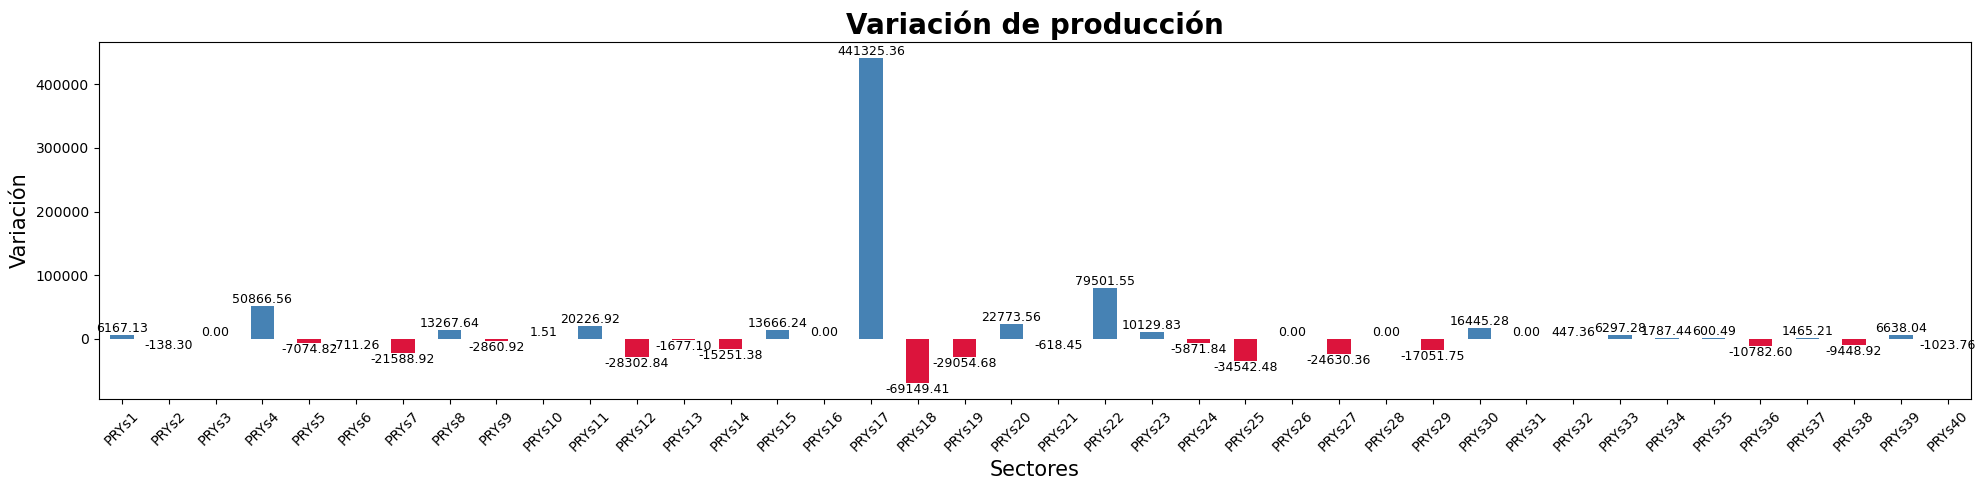

In [4]:
f.shock()

Ahora queda calcular $\triangle$P$^{(p)}$ con la ecuación del modelo simple
$$
\begin{aligned}
\triangle p^{(p)} &= (I - A^{(pp)})^{-1} \triangle d^{(p)} 
\end{aligned}
$$

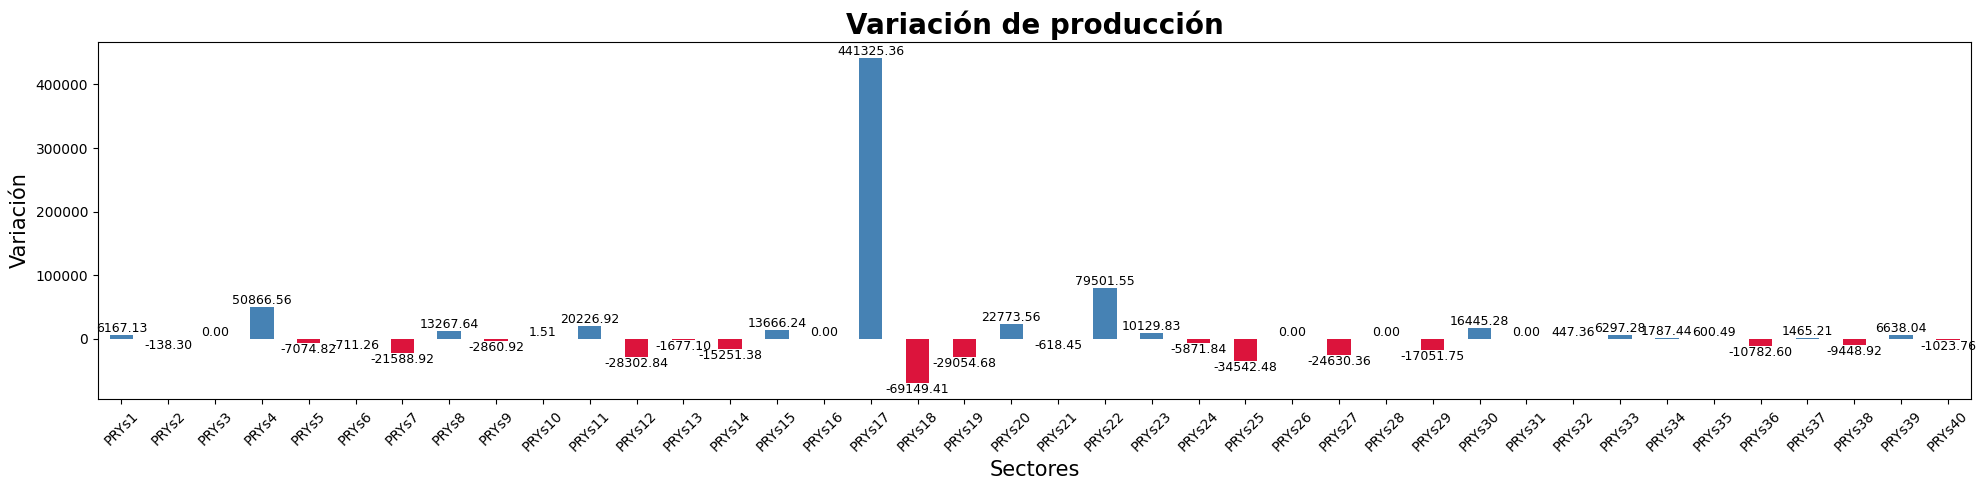

In [12]:
f.regionSimple()

Como se puede apreciar la variación es exactamente igual. Esto se debe a que $A^{np}$ es una matriz de ceros, lo que significa que los sectores de Nicaragua no consumen nada de Paraguay, por lo tanto la producción no se modifica teniendo en cuenta a Nicaragua